In [87]:
from deepface import DeepFace 
import cv2
from matplotlib import pyplot as plt
import random as rd
import os
import time
import face_recognition as fc
import numpy as np
# from mtcnn import MTCNN

In [113]:
img_path1 = 'testdb/20.jpg'
img_path2 = 'testdb/21.jpg'
img_path_same = 'testdb/2.jpg'
img_path_img = 'testdb/asek1.jpg'
img_path_img1 = 'testdb/asek2.jpg'


In [114]:
try:
  img1 = DeepFace.extract_faces(img_path_same)
  img2 = DeepFace.extract_faces(img_path_img)
except:
  print("Face couldn't detected")

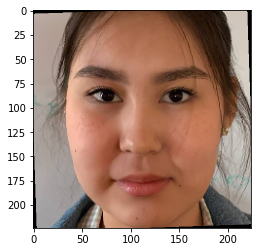

In [115]:
plt.imshow(img1[0]['face'])

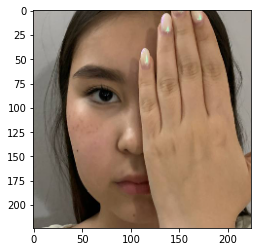

In [116]:
plt.imshow(img2[0]['face'])

In [117]:

res = DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='Facenet')
res1 = DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='VGG-Face')


In [118]:
res['verified'], res1['verified']

(True, True)

FaceNet

In [320]:
resStart1 = time.time()
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='Facenet')
resEnd1 = time.time()

differenceTime1 = resEnd1 - resStart1
print("FaceNet Speed", differenceTime1) 

FaceNet Speed 0.6076719760894775


VGG-Face

In [321]:
resStart2 = time.time()
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='VGG-Face')
resEnd2 = time.time()

differenceTime2 = resEnd2 - resStart2

print("VGG-Face Speed", differenceTime2) 

VGG-Face Speed 0.5653460025787354


In [253]:
res1

{'verified': True,
 'distance': 0.27104987309869777,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 193, 'y': 376, 'w': 420, 'h': 420},
  'img2': {'x': 126, 'y': 311, 'w': 400, 'h': 400}},
 'time': 2.35}

In [17]:
# ana = DeepFace.analyze(img_path_person)
# ana

In [40]:
dfs = DeepFace.find(img_path=img_path1, db_path='deleted', model_name='Facenet')

There are  37  representations found in  representations_facenet.pkl
find function lasts  0.10150814056396484  seconds


In [41]:
dfs

[                   identity  source_x  source_y  source_w  source_h  \
 0   deleted/19B030068/2.png        76       109       312       312   
 1   deleted/19B030068/9.png        76       109       312       312   
 2  deleted/19B030067/10.png        76       109       312       312   
 3   deleted/19B030068/5.png        76       109       312       312   
 
    Facenet_cosine  
 0        0.094742  
 1        0.156940  
 2        0.167082  
 3        0.230080  ]

In [46]:
new_path = dfs[0].iloc[0]['identity']
new_path

'deleted/19B030222/1.png'

In [47]:
res_compare = DeepFace.verify(img1_path=img_path1, img2_path=new_path, model_name='Facenet')

In [48]:
res_compare

{'verified': True,
 'distance': 0.2645570274215987,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 164, 'y': 284, 'w': 616, 'h': 616},
  'img2': {'x': 246, 'y': 522, 'w': 261, 'h': 261}},
 'time': 0.26}